<a href="https://colab.research.google.com/github/crisalves82/crisalves82/blob/main/Cristiane_Alves_relat%C3%B3rio_FINAL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório Final - Estágio IV




#Introdução


O presente relatório tem o seguinte tema:

**Os Bilionários da FORBES 2022**

Para isso, utilizou o base de dados os passageiros do titanic presente no kaggle (https://www.kaggle.com/datasets/surajjha101/forbes-billionaires-data-preprocessed). 

Dessa forma, o objetivo desse relatório é responder as seguintes perguntas:


*   Como está distribuido as maiores riquezas mundiais?
*   Como está o Brasil em relação aos outros países?






In [ ]:
Fortuna = float(input("Qual o valor da sua Fortuna? "))

if Fortuna > 1000000 : 
  print( "Parabens!!! Você já pode fazer parte da lista da Forbes")
else:
  print ( "Falta pouco para entrar na lista da Forbes!")

Qual o valor da sua Fortuna? 50000
Falta pouco para entrar na lista da Forbes!


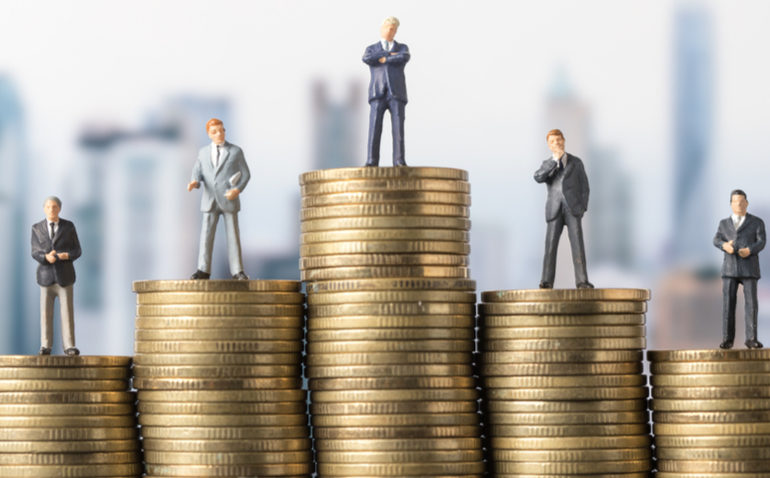

# Desenvolvimento

## Leitura do banco de dados e primeiras observações

In [3]:
#Importar as bibliotecas que serão utilizadas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
#Ler um arquivo em formato csv e salvar na variavel dados 
Forbes = pd.read_csv('/content/Forbes Billionaires.csv')

In [5]:
#Ler as informações de cima do banco de dados
Forbes.head()

,Rank,Name,Networth,Age,Country,Source,Industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


In [6]:
#Ler as informações de baixo do banco de dados
Forbes.tail()

,Rank,Name,Networth,Age,Country,Source,Industry
2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail
2599,2578,Horst-Otto Gerberding,1.0,69,Germany,flavors and fragrances,Food & Beverage


In [7]:
#Informações sobre os dados
Forbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      2600 non-null   int64  
 1   Name      2600 non-null   object 
 2   Networth  2600 non-null   float64
 3   Age       2600 non-null   int64  
 4   Country   2600 non-null   object 
 5   Source    2600 non-null   object 
 6   Industry  2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 142.3+ KB


## Limpeza do banco de dados

In [8]:
# Verificando se existe caso duplicado
sum(Forbes.duplicated()) 

0

Como o objetivo deste relatório é analisar as variáveis que contribuem para a
verificação das maiores riquezas mundiais de acordo com a Revista Forbes, não será retirada nenhum dado, pois todos são imporantes para a conclusão do trabalho.




## Análise de dados

In [9]:
#Estatísticas dos dados
Forbes[['Networth', 'Age']].describe()

,Networth,Age
count,2600.000000,2600.000000
mean,4.860750,64.271923
std,10.659671,13.220607
min,1.000000,19.000000
25%,1.500000,55.000000
50%,2.400000,64.000000
75%,4.500000,74.000000
max,219.000000,100.000000


São 2600 nomes dos empresarios mais ricos no mundo de acordo com a Revista Forbes. A média de valores são  4.86 bilhões de dolares e a idade média dos empresários está em 64 anos. A fortuna mínima ficou em  1 bilhão e a máxima em  219 bilhões de dolares, a idade mínima dos empresparios de 19 anos e a máxima de 100 anos.

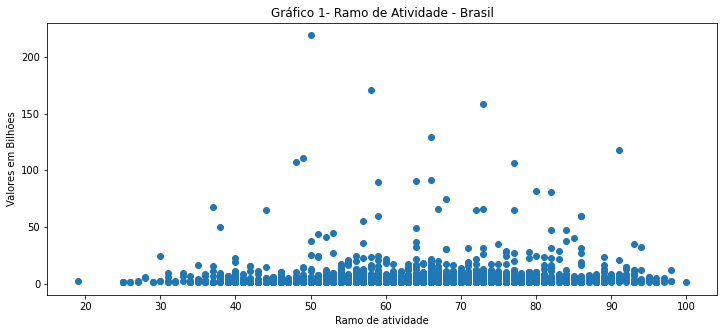

In [10]:
Age=Forbes['Age']
Networth= Forbes ['Networth']
fig, ax=plt.subplots(figsize=(12,5))
ax.scatter(Age,Networth)
plt.title('Gráfico 1- Ramo de Atividade - Brasil')
plt.ylabel('Valores em Bilhões')
plt.xlabel('Ramo de atividade')

plt.show()

O Gráfico 1 mostra que são poucos os empresários que tem fortuna superior a 100 bilhões.

In [11]:
# Analisando o valor da mediana 
print(Forbes['Age'].median())

64.0


In [12]:
print(Forbes['Networth'].median())

2.4


In [ ]:
print(Forbes['Age'].mode())

0    64
dtype: int64


A moda indica que a maioria dos empresários tem 64 anos, seguindo o padrão da mediana e média.

In [ ]:
print(Forbes['Networth'].mode())

0    1.5
dtype: float64


Já em relação ao patrimônio, a moda está muito distante da média( 4.86) e da mediana ( 2.4). Essa sitação pode ser explicada pelos valores de patriminio que são muito superiores, aumentanto assim o valor da média.

In [ ]:
#Correlação entre as variáveis
Forbes[['Networth', 'Age']].corr()

,Networth,Age
Networth,1.000000,0.039966
Age,0.039966,1.000000


In [13]:
Forbes[['Networth', 'Age']].cov()

,Networth,Age
Networth,113.628579,5.632301
Age,5.632301,174.784436


As medidas de covariância e correlação indicam quem a medida que os empresários ficam mais velhos tambem ocorre um aumento no patrimônio.

In [11]:
Forbes['Networth'].sum()

12637.949999999999

Os empresárarios mais ricos do mundo acumulam uma riqueza de 12.637 trilhões de dolares. 

In [12]:
Paises_ricos= Forbes.groupby('Country')["Networth"].sum()
Paises_ricos

Country
Algeria             5.1
Argentina          14.0
Australia         205.1
Austria            61.7
Barbados            1.7
                  ...  
United States    4685.1
Uruguay             3.0
Venezuela           3.5
Vietnam            21.2
Zimbabwe            3.0
Name: Networth, Length: 75, dtype: float64

In [68]:
Forbes.groupby('Country')["Networth"].mean().to_frame()

,Networth
Country,
Algeria,5.100000
Argentina,2.333333
Australia,4.661364
Austria,5.609091
Barbados,1.700000
...,...
United States,6.516134
Uruguay,1.500000
Venezuela,3.500000


In [69]:
Forbes.groupby('Industry')["Networth"].mean().to_frame()

,Networth
Industry,
Automotive,8.443478
Construction & Engineering,2.811628
Energy,4.250538
Fashion & Retail,6.557724
Finance & Investments,4.493005
Food & Beverage,4.643532
Gambling & Casinos,4.678261
Healthcare,3.343868
Logistics,5.605714


In [67]:
Setores_ricos= Forbes.groupby('Industry')["Networth"].sum()
Setores_ricos

Industry
Automotive                      582.60
Construction & Engineering      120.90
Energy                          395.30
Fashion & Retail               1613.20
Finance & Investments          1734.30
Food & Beverage                 933.35
Gambling & Casinos              107.60
Healthcare                      708.90
Logistics                       196.20
Manufacturing                  1079.80
Media & Entertainment           493.60
Metals & Mining                 389.70
Real Estate                     685.80
Service                         186.10
Sports                           97.60
Technology                     2168.40
Telecom                         205.10
diversified                     939.50
Name: Networth, dtype: float64

In [62]:
Pais = Forbes['Country'].value_counts(normalize=True)
Pais

United States           0.276538
China                   0.198077
India                   0.061923
Germany                 0.050000
Russia                  0.031154
                          ...   
Venezuela               0.000385
Portugal                0.000385
Algeria                 0.000385
Eswatini (Swaziland)    0.000385
Estonia                 0.000385
Name: Country, Length: 75, dtype: float64

Dos 75 países que estam na lista da Forbes, as maiores riquezas mundiais estam localizadas principalmente nos Estados Unidos com 27,65%, seguido da China com 19,81%. India, Alemanha e Russia não ultrapassam os 15% juntas.

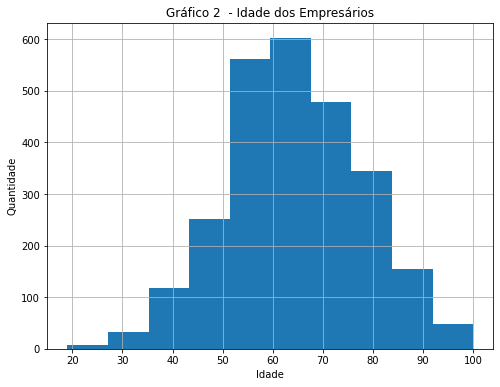

In [21]:
Forbes['Age'].hist(figsize = (8,6));
plt.title('Gráfico 2  - Idade dos Empresários')
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.show()

Analisando o Gráfico 2 , pode ser verificado que a maioria dos empresários tem em média entre 60 e 70 anos.

In [65]:
Ramo = Forbes['Source'].value_counts(normalize=True)
Ramo

real estate               0.056923
investments               0.035769
pharmaceuticals           0.035000
diversified               0.031923
software                  0.021923
                            ...   
ticketing service         0.000385
touch screens             0.000385
defense                   0.000385
shipping, airlines        0.000385
flavors and fragrances    0.000385
Name: Source, Length: 895, dtype: float64

Os 5 maiores ramos de atuação que possuem aoss maiores patrimônio são: imobiliário com 5,7%, investimento com 3,6%, farmaceutico com 3,5%, diversificado com 3,2% e software com 2,2%. Juntos não ultrapassam 20% do total da riqueza mundial.

##Análise de dados - Brasil

In [14]:
sum((Forbes["Country"] == "Brazil"))


60

O Brasil apresenta 60 empresários com os maiores patrimônios mundiais.

In [15]:
B= (Forbes["Country"] == "Brazil")
B

0       False
1       False
2       False
3       False
4       False
        ...  
2595    False
2596    False
2597    False
2598    False
2599    False
Name: Country, Length: 2600, dtype: bool

In [17]:
BR=Forbes[B]
BR

,Rank,Name,Networth,Age,Country,Source,Industry
116,117,Jorge Paulo Lemann & family,15.4,82,Brazil,beer,Food & Beverage
186,185,Eduardo Saverin,10.6,40,Brazil,Facebook,Technology
195,192,Marcel Herrmann Telles,10.3,72,Brazil,beer,Food & Beverage
206,206,Jorge Moll Filho & family,9.8,77,Brazil,hospitals,Healthcare
252,251,Carlos Alberto Sicupira & family,8.5,74,Brazil,beer,Food & Beverage
309,304,Safra siblings,7.7,64,Brazil,banking,Finance & Investments
357,350,Lucia Maggi & family,6.9,89,Brazil,agribusiness,diversified
437,438,Andre Esteves,5.8,53,Brazil,banking,Finance & Investments
536,536,Alexandre Behring,5.1,55,Brazil,investments,Finance & Investments
587,586,Luciano Hang,4.8,59,Brazil,department stores,Fashion & Retail


In [18]:
BR['Networth'].sum()

184.7

Os 60 empresários brasileiros possuem juntos 1,46% sobre a riqueza total apresentada pela revista Forbes, um valor de 184.7 bilhões de dolares. 

In [19]:
PL= BR.groupby('Industry')["Networth"].sum()
PL

Industry
Energy                     4.9
Fashion & Retail          16.9
Finance & Investments     38.7
Food & Beverage           48.0
Healthcare                23.2
Manufacturing              7.2
Media & Entertainment      6.0
Real Estate                1.1
Technology                11.9
diversified               26.8
Name: Networth, dtype: float64

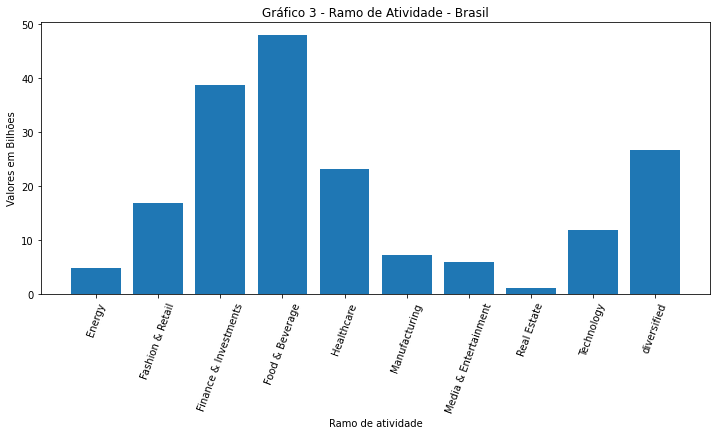

In [22]:
from IPython.core.pylabtools import figsize
ramobr=['Energy','Fashion & Retail','Finance & Investments','Food & Beverage','Healthcare','Manufacturing','Media & Entertainment','Real Estate','Technology','diversified']
riquezabr=[4.9,16.9,38.7,48,23.2,7.2,6,1.1,11.9,26.8]
fig, ax=plt.subplots(figsize=(12,5))
plt.title('Gráfico 3 - Ramo de Atividade - Brasil')
plt.ylabel('Valores em Bilhões')
plt.xlabel('Ramo de atividade')
ax.bar(ramobr,riquezabr)
plt.xticks(rotation=70)
plt.show()

Com base no Gráfico 3, as maiores fortunas brasileiras estam no ramo de Comida e Bebida, seguido de finanças e investimentos, bem como em ramos diversificado.


# Conclusão

Os Estados Unidos é o país onde estam as maiores fortunas, com nomes bem conhecidos como: Elon Musk do ramo automotivo; Jeff Bezos,Bil Gates, Larry Page, Sergey Brin e Larry Ellisondo ramos tecnológico; e Warren Buffett do ramo financeiro e investimentos. Todos com património superior a 100 bilhões de dolares. A China aparece em seguida com a maioria dos empresários com patrimônio abaixo dos 2 bilhões. Alguns países como Portugal, Venezuela e Estônia possuem apenas um representante.

O empresário mais jovem,  que integra a lista da Forbes possui a fortuna de 2.4 bilhões e atua no ramo da moda. O mais velho possui a fotuna de 1.8 bilhões e atua no ramo finaneiro e investimento. 

O ramo de atuação são bem diversificados, com maior proporção no ramo imobiliário, seguido do ramo financeiro e investimentos.

No Brasil, as maiores fortunas são de Jorge Paulo Lemann e Marcel Herrmann do ramos de comida e bebida, seguido de Eduardo Saverin do ramo tecnológico, todos com patrimônio superior a 10 bilhões de dolares. A maioria dos empresários possuem patrimônio entre 2 e 1.1 bilhões.

O empresário mais jovem tem a fortuna de 1.5 bilhões e atua no ramo financeiro e investimento. A mais velha possui a fotuna de 4.1 bilhões e atua no ramo diversificado.

O ramo de atuação é bem concentrado no ramos de comida e bebida, seguido pelo ramo financeiro e investiementos, com menor proporção no ramo imobiliário, seguindo de forma diferente em relação aos outros países.

## Limitações


Com relação aos dados analisados, ocorreram limitações sobre algumas variaveis:

* Source: Não possui um padrão de resposta, o que impossibilitou a comparação com as outras variáveis.



## Referências



Sites utilizados como referências:

https://www.alura.com.br/conteudo/python-funcoes-pacotes-pandas#:~:text=Por%20fim%2C%20adicionaremos%20um%20ponto,e%20a%20fun%C3%A7%C3%A3o%20describe()%20.&text=O%20Pandas%20gerar%C3%A1%2C%20de%20forma,distribui%C3%A7%C3%A3o%20e%20o%20valor%20m%C3%A1ximo.


https://felipegalvao.com.br/pt/blog/descriptive-statistics-with-python/

https://www.delftstack.com/pt/howto/python-pandas/how-to-get-the-sum-of-pandas-column/

https://www.youtube.com/watch?v=IR0lSSIV5iE